# Pulse-width-modulation data generation

This notebook generates very basic datasets of sinus functions of different frequency, that get pulse-width modulated into square functions. The datasets are saved as `.csv` files

In [14]:
# imports 
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SEQ_LEN = 50000

## Simple Square Function 

sin fct with corresponding square fct.
param: a

- network input: sin + a param
- network output: square fct 

In [15]:
def create_sin_sq(a, seq_len):
    t = np.linspace(0, 10, seq_len, endpoint=False)
    sin = np.sin(np.pi * a * t)
    squ = signal.square(np.pi * a * t)
    param_a = [a] * seq_len
    return sin, squ, param_a

(-1.5, 1.5)

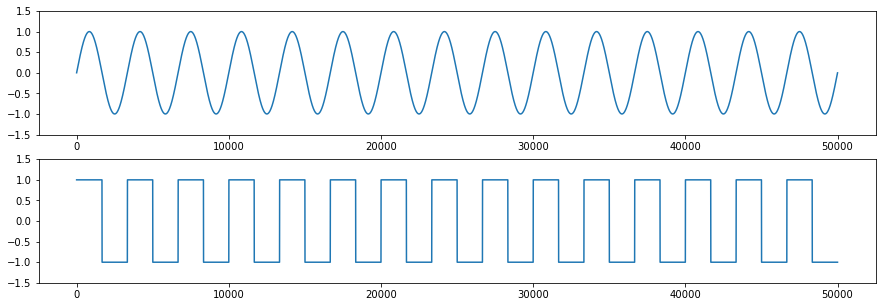

In [16]:
# ds modulation 
a = 3

sin, pwm, param_a = create_sin_sq(a, SEQ_LEN)

plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.plot(sin)
plt.ylim(-1.5, 1.5)

plt.subplot(2, 1, 2)
plt.plot(pwm)
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

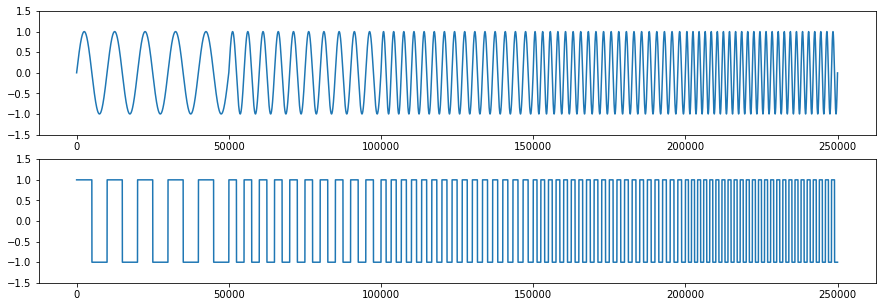

In [17]:
sin, squ, param_a = [], [], []

for i in range(1,6):
    sin_, squ_, param_a_ = create_sin_sq(i, SEQ_LEN)
    sin = np.append(sin, sin_)
    squ = np.append(squ, squ_)
    param_a = np.append(param_a, param_a_)
    
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.plot(sin)
plt.ylim(-1.5, 1.5)

plt.subplot(2, 1, 2)
plt.plot(squ)
plt.ylim(-1.5, 1.5)

In [18]:
# export to csv
df = pd.DataFrame()

df["sin"] = sin
df["pwm"] = squ
df["param_a"] = param_a

df.to_csv("sin_squ.csv")

## Pulse-width modulated square function

sin fct + modulating pulse width of a square fct 

- network input: sin + a param
- network output: sqare fct

In [19]:
def create_sin_pwm(a, seq_len):
    t = np.linspace(0, 10, seq_len, endpoint=False)
    sin = np.sin(np.pi * a * t)
    pwm = signal.square(sin * 30, duty=(sin + 1)/2)
    param_a = [a] * SEQ_LEN
    return sin, pwm, param_a

(-1.5, 1.5)

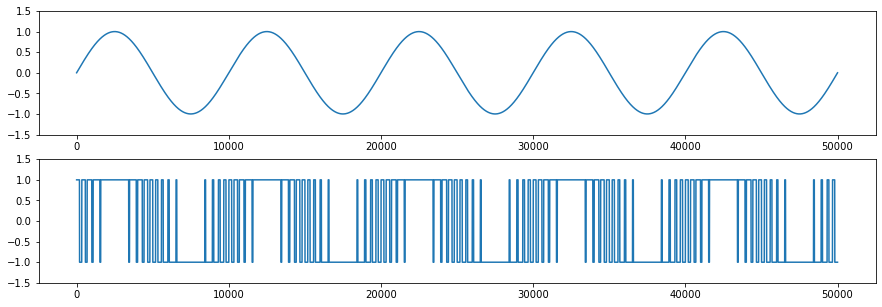

In [20]:
# ds modulation 
a = 1
sin, pwm, param_a = create_sin_pwm(a, SEQ_LEN)

plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.plot(sin)
plt.ylim(-1.5, 1.5)

plt.subplot(2, 1, 2)
plt.plot(pwm)
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

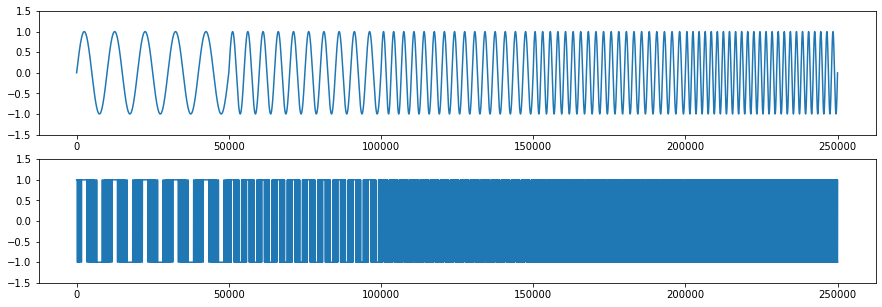

In [21]:
sin, pwm, param_a = [], [], []

for i in range(1,6):
    sin_, pwm_, param_a_ = create_sin_pwm(i, SEQ_LEN)
    sin = np.append(sin, sin_)
    pwm = np.append(pwm, pwm_)
    param_a = np.append(param_a, param_a_)

plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.plot(sin)
plt.ylim(-1.5, 1.5)

plt.subplot(2, 1, 2)
plt.plot(pwm)
plt.ylim(-1.5, 1.5)

In [22]:
# export to csv
df = pd.DataFrame()

df["sin"] = sin
df["pwm"] = pwm
df["param_a"] = param_a

df.to_csv("sin_pwm.csv")

# Pulse-width modulated square fct with sin + cos 

square fct from sin + pwm with cos

- network input: sin + cos + params
- network output: square fct

In [23]:
def create_sin_tan_pwm(a, b, seq_len):
    t = np.linspace(0,10, seq_len, endpoint=False)
    sin = np.sin(np.pi * a * t)
    tan = np.tan(np.pi * b * t)
    pwm = signal.square(tan * 30, duty=(sin + 1)/2)
    param_a = [a] * seq_len
    param_b = [b] * seq_len
    return sin, tan, pwm, param_a, param_b

(-1.5, 1.5)

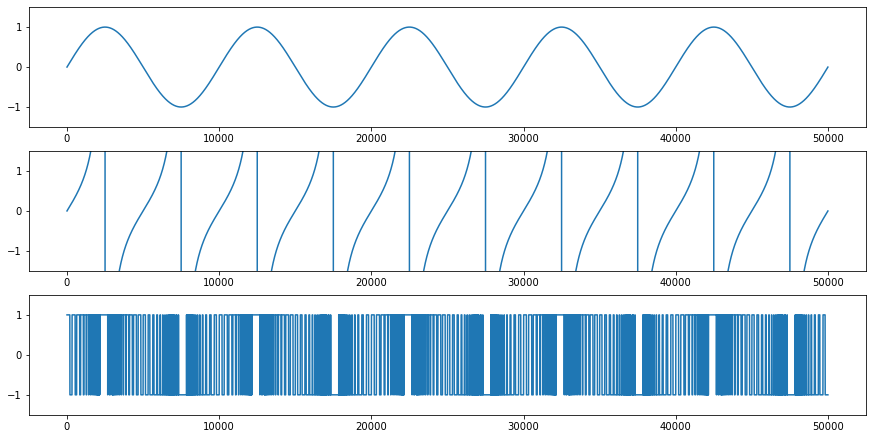

In [24]:
a, b = 1, 1

sin, tan, pwm, param_a, param_b = create_sin_tan_pwm(a, b, SEQ_LEN)

plt.figure(figsize=(15, 7.5))
plt.subplot(3, 1, 1)
plt.plot(sin)
plt.ylim(-1.5, 1.5)

plt.subplot(3, 1, 2)
plt.plot(tan)
plt.ylim(-1.5, 1.5)

plt.subplot(3, 1, 3)
plt.plot(pwm)
plt.ylim(-1.5, 1.5)


(-1.5, 1.5)

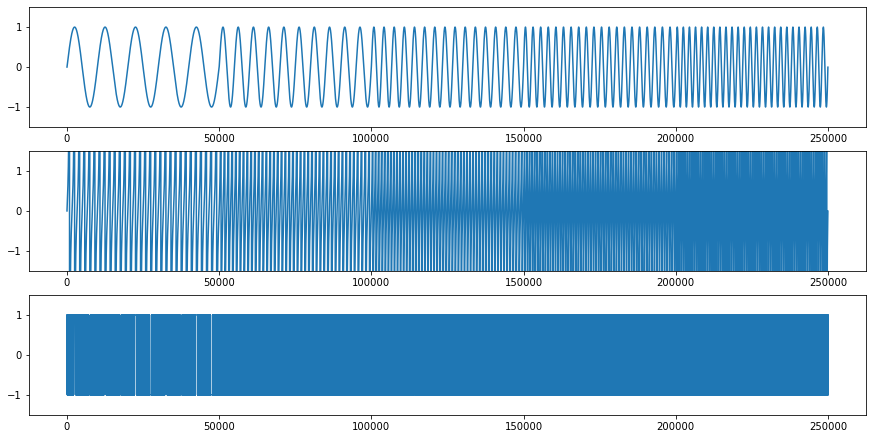

In [25]:
sin, tan, pwm, param_a, param_b = [], [], [], [], []

for i in range(1,6):
    j = i + 2
    sin_, tan_, pwm_, param_a_, param_b_ = create_sin_tan_pwm(i, j, SEQ_LEN)
    sin = np.append(sin, sin_)
    tan = np.append(tan, tan_)
    pwm = np.append(pwm, pwm_)
    param_a = np.append(param_a, param_a_)
    param_b = np.append(param_b, param_b_)

plt.figure(figsize=(15, 7.5))
plt.subplot(3, 1, 1)
plt.plot(sin)
plt.ylim(-1.5, 1.5)

plt.subplot(3, 1, 2)
plt.plot(tan)
plt.ylim(-1.5, 1.5)

plt.subplot(3, 1, 3)
plt.plot(pwm)
plt.ylim(-1.5, 1.5)


In [26]:
# export to csv
df = pd.DataFrame()

df["sin"] = sin
df["tan"] = tan
df["pwm"] = pwm
df["param_a"] = param_a
df["param_b"] = param_b

df.to_csv("sin_tan_pwm.csv")